# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- **Nama:** Najwa Salsabila
- **Email:** najwas.for.study@gmail.com
- **ID Dicoding:** najwasalsabila

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
!pip install shap

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from joblib import dump, load
import shap
from xgboost import plot_importance

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Menyiapkan data yang akan digunakan

In [38]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

**Edutech Student Performance Data**

The data contains student demographic details, academic background, and performance indicators used to predict dropout and academic success.

*   **Marital_status** – Student's marital status (1=Single, 2=Married, 3=Widower, 4=Divorced, 5=Facto Union, 6=Legally Separated)
*   **Application_mode** – Method of application to the institution (e.g., 1=1st Phase - General, 15=International Student, 42=Transfer)
*   **Application_order** – Order of the course chosen during application (0=First choice, up to 9=Last choice)
*   **Course** – Undergraduate course enrolled by the student (e.g., 9003=Agronomy, 9147=Management, 9500=Nursing)
*   **Daytime_evening_attendance** – Attendance time (1=Daytime, 0=Evening)
*   **Previous_qualification** – Education level before enrollment (e.g., 1=Secondary Education, 4=Master's Degree, 19=Basic Education)
*   **Previous_qualification_grade** – Grade from the previous qualification (0 to 200 scale)
*   **Nacionality** – Student’s nationality (e.g., 1=Portuguese, 41=Brazilian, 105=Russian)
*   **Mothers_qualification** – Mother's education level (e.g., 1=Secondary, 4=Master's, 35=Illiterate)
*   **Fathers_qualification** – Father's education level (same scale as mother)
*   **Mothers_occupation** – Mother's occupation (e.g., 2=Scientist, 5=Sales Worker, 9=Unskilled Worker)
*   **Fathers_occupation** – Father's occupation (same scale as mother)
*   **Admission-grade** – Grade used for university admission (0 to 200 scale)
*   **Displaced** – Whether the student lives away from their original home (1=Yes, 0=No)
*   **Educational_special_needs** – Student has special educational needs (1=Yes, 0=No)
*   **Debtor** – Whether the student has unpaid dues (1=Yes, 0=No)
*   **Tuition_fees_up_to_date** – Are the tuition fees fully paid? (1=Yes, 0=No)
*   **Gender** – Student's gender (1=Male, 0=Female)
*   **Scholarship_holder** – Student receives a scholarship (1=Yes, 0=No)
*   **Age_at_enrollment** – Age at the time of enrollment (numerical)
*   **International** – Student is international (1=Yes, 0=No)
*   **Curricular_units_1st_sem_credited** – Number of courses credited in the 1st semester
*   **CurricularUnits1stSemEnrolled** – Number of courses enrolled in the 1st semester
*   **CurricularUnits1stSemEvaluations** – Number of courses with evaluations in the 1st semester
*   **CurricularUnits1stSemApproved** – Number of courses passed in the 1st semester



In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [40]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [43]:
df["Status"].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [44]:
# Extract students currently enrolled for future prediction using a machine learning model
df_enrolled = df[df.Status == 'Enrolled']
# Exclude 'Enrolled' students from the main dataset for current analysis
df = df[df.Status != 'Enrolled']

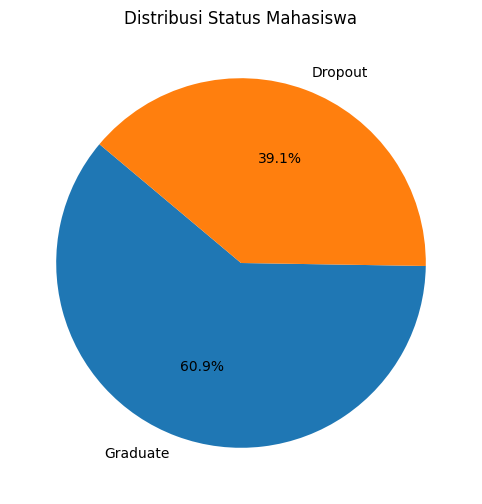

In [45]:
status_distribution = df['Status'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(status_distribution,
        labels=status_distribution.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribusi Status Mahasiswa')
plt.show()

In [46]:
cat_cols = [
    'Marital_status', 'Application_mode', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification',
    'Nacionality','Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation','Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
    'Gender', 'Scholarship_holder', 'International'
]

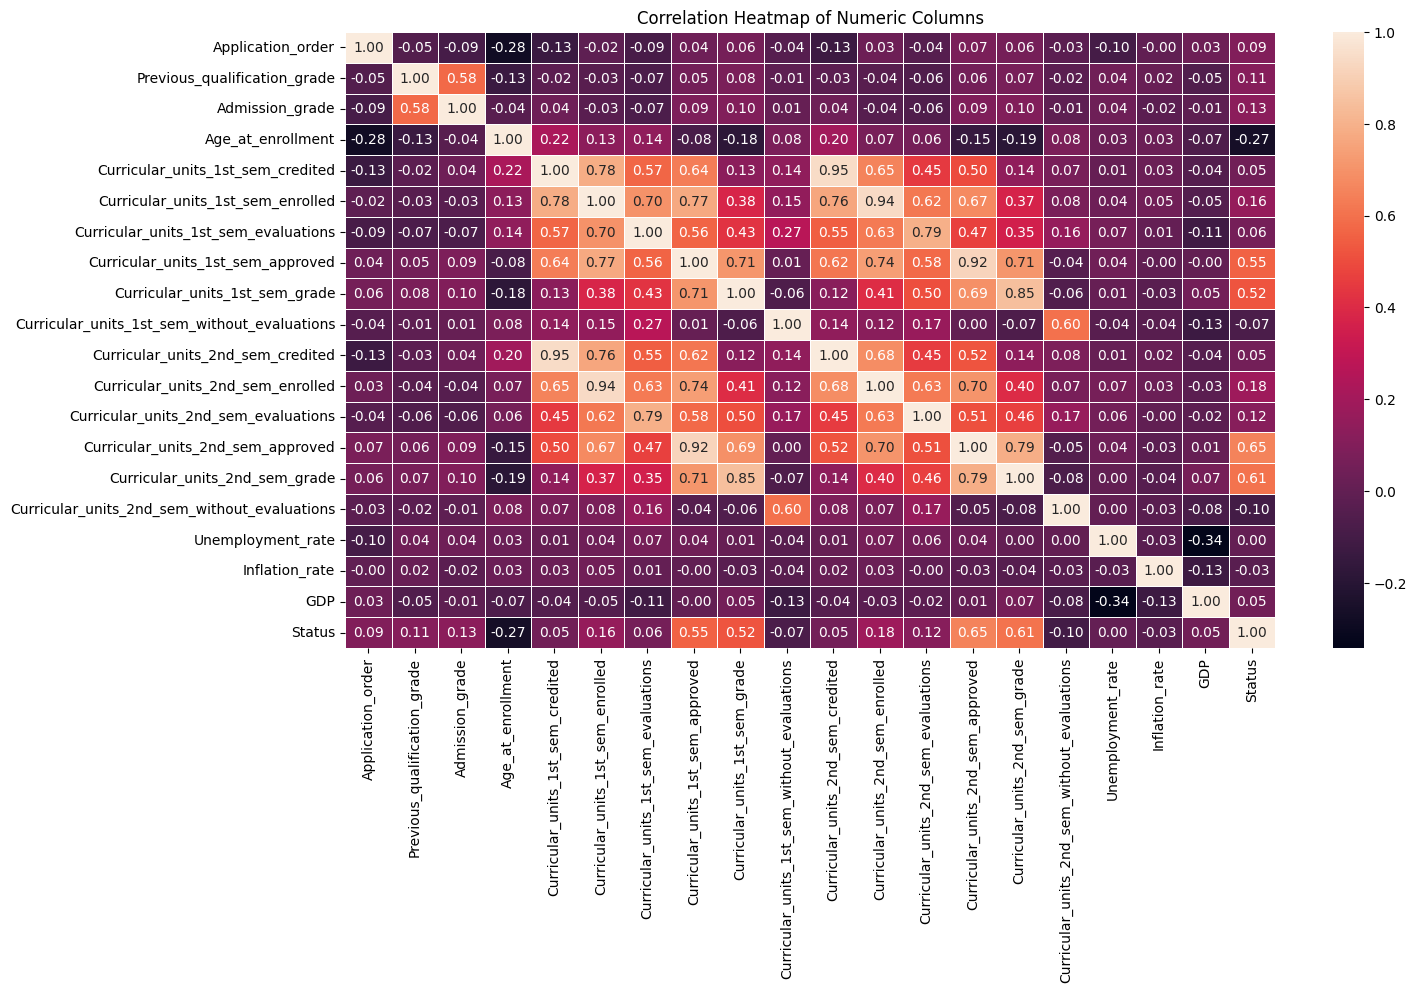

In [47]:
df['Status'] = LabelEncoder().fit_transform(df['Status'])

correlation_matrix = df.drop(columns=cat_cols).corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

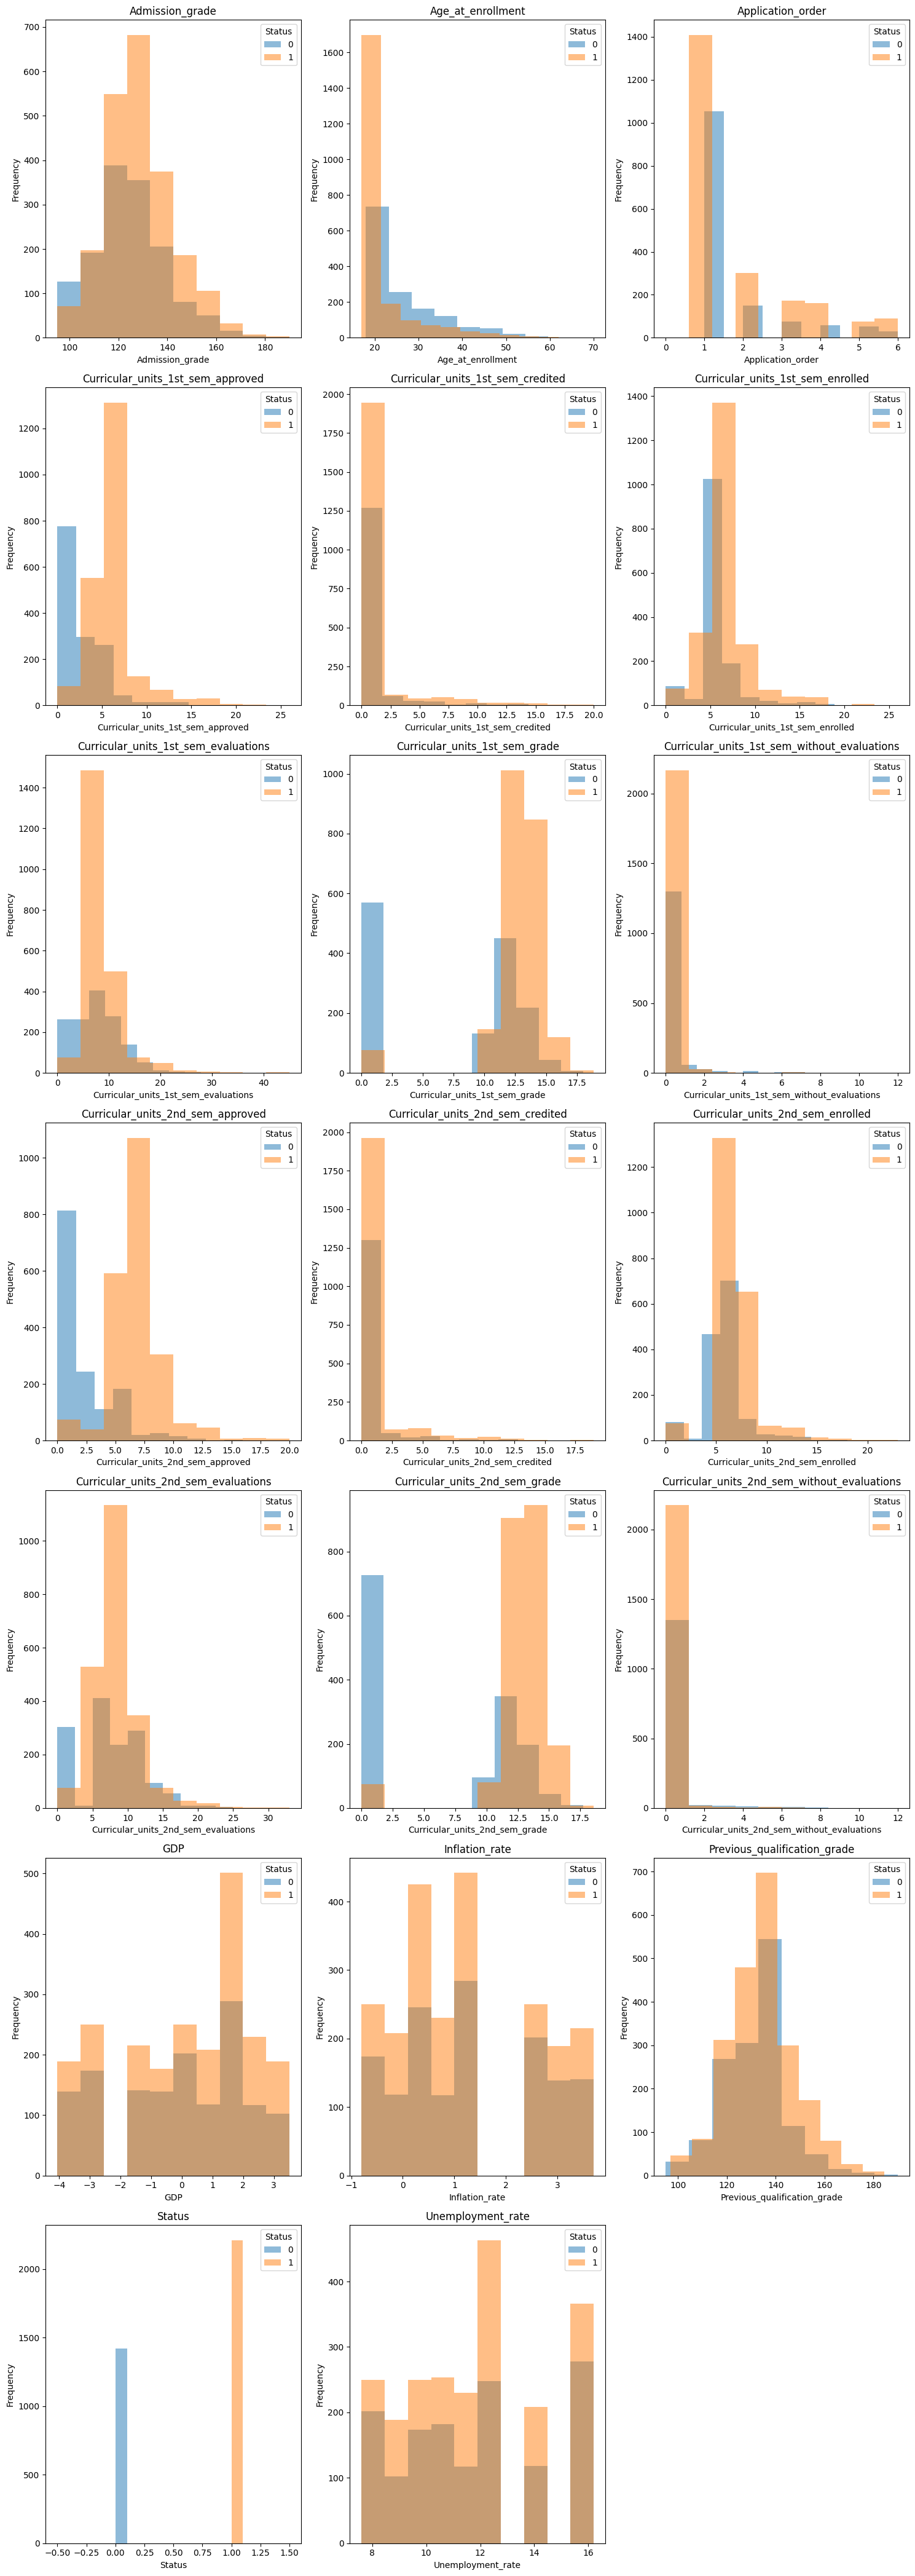

In [48]:
# Select numeric columns only
nume_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(cat_cols)

# Set subplot grid dimensions
num_cols = 3
num_rows = -(-len(nume_cols) // num_cols)  # Ceiling division

# Initialize subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
axes = axes.flatten()

# Plot histogram for each numeric column by 'Status'
for i, col in enumerate(nume_cols):
    for status, group in df.groupby('Status'):
        axes[i].hist(group[col], bins=10, alpha=0.5, label=status)
    axes[i].set(title=col, xlabel=col, ylabel='Frequency')
    axes[i].legend(title='Status')

# Remove unused axes
for ax in axes[len(nume_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


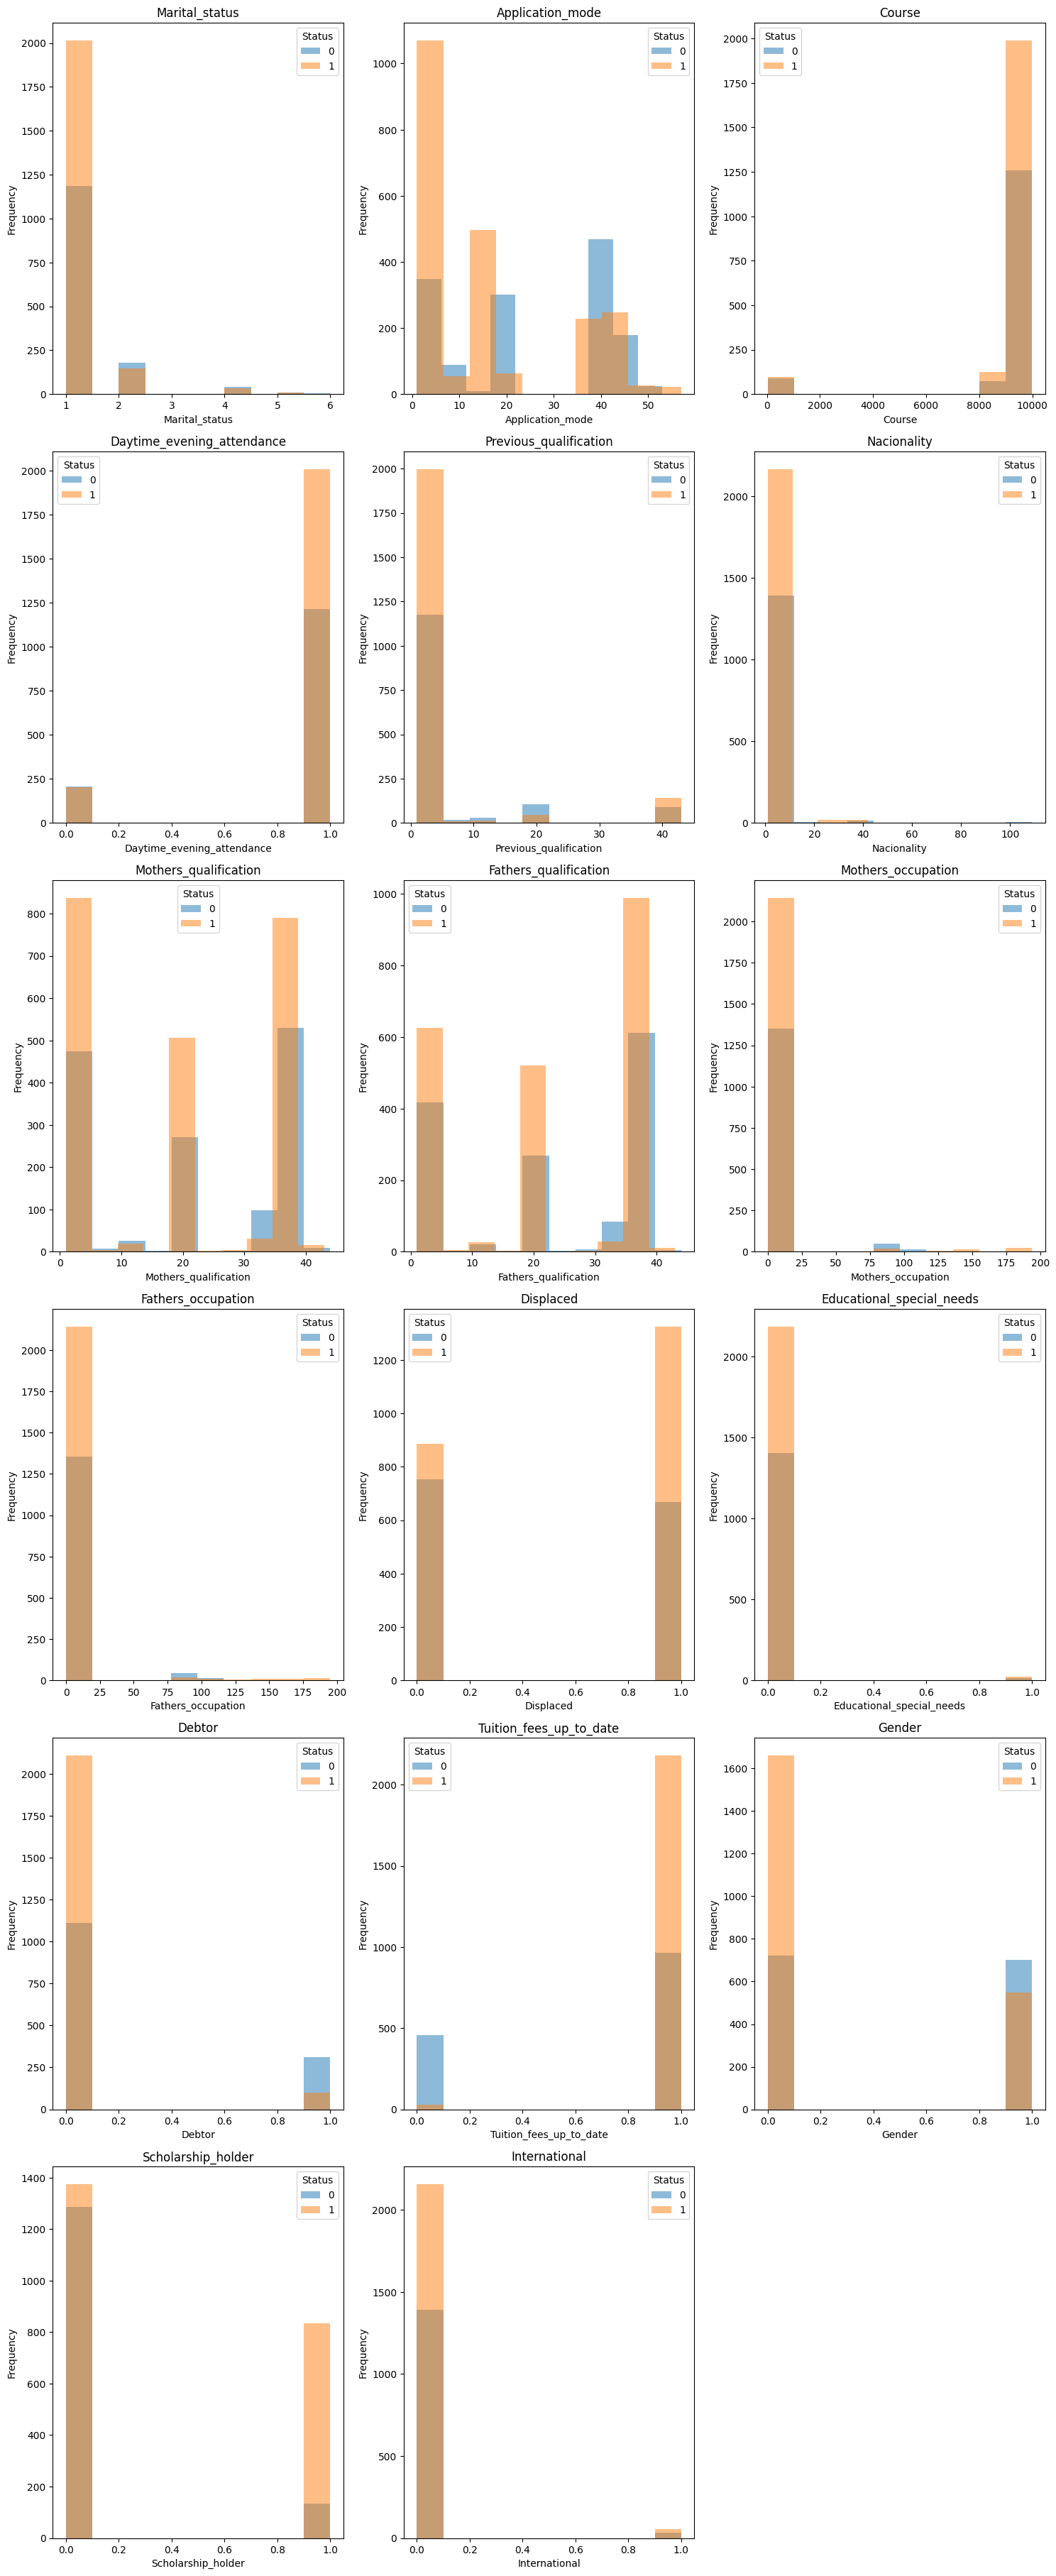

In [49]:
# Initialize subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
axes = axes.flatten()

# Plot histogram for each numeric column by 'Status'
for i, col in enumerate(cat_cols):
    for status, group in df.groupby('Status'):
        axes[i].hist(group[col], bins=10, alpha=0.5, label=status)
    axes[i].set(title=col, xlabel=col, ylabel='Frequency')
    axes[i].legend(title='Status')

# Remove unused axes
for ax in axes[len(cat_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


## Data Preparation / Preprocessing

In [50]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Marital_status,3630.0,1.184298,0.613009,1.00,1.000000,1.000000,1.00,6.000000
Application_mode,3630.0,18.421763,17.358595,1.00,1.000000,17.000000,39.00,57.000000
Application_order,3630.0,1.750138,1.333831,0.00,1.000000,1.000000,2.00,6.000000
Course,3630.0,8853.980992,2068.760082,33.00,9085.000000,9254.000000,9556.00,9991.000000
Daytime_evening_attendance,3630.0,0.887603,0.315897,0.00,1.000000,1.000000,1.00,1.000000
Previous_qualification,3630.0,4.532231,10.024134,1.00,1.000000,1.000000,1.00,43.000000
Previous_qualification_grade,3630.0,132.920606,13.238373,95.00,125.000000,133.100000,140.00,190.000000
Nacionality,3630.0,1.828099,6.667614,1.00,1.000000,1.000000,1.00,109.000000
Mothers_qualification,3630.0,19.986226,15.585278,1.00,2.000000,19.000000,37.00,44.000000
Fathers_qualification,3630.0,22.571625,15.275453,1.00,3.000000,19.000000,37.00,44.000000


In [ ]:
# cat_col = ['Attrition', 'BusinessTravel',
#        'Department', 'Education', 'EducationField',
#        'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
#        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
#        'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating',
#        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'WorkLifeBalance']

# df[cat_col] = df[cat_col].astype(str)

# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   object
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EmployeeCount             1058 non-null   object
 10  EnvironmentSatisfaction   1058 non-null   object
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   object
 14  JobLevel                  105

In [33]:
df.nunique()

,0
Marital_status,6
Application_mode,18
Application_order,7
Course,17
Daytime_evening_attendance,2
Previous_qualification,17
Previous_qualification_grade,101
Nacionality,19
Mothers_qualification,29
Fathers_qualification,34


In [51]:
correlation_matrix = df.drop(columns=cat_cols).corr()
correlation_matrix

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
Application_order,1.000000,-0.051715,-0.092324,-0.281641,-0.133504,-0.015182,-0.086004,0.038274,0.060776,-0.038958,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Previous_qualification_grade,-0.051715,1.000000,0.577241,-0.133535,-0.017717,-0.033503,-0.072595,0.054120,0.077191,-0.011857,-0.026107,-0.036162,-0.061730,0.055232,0.068240,-0.023654,0.043345,0.019247,-0.054349,0.109464
Admission_grade,-0.092324,0.577241,1.000000,-0.035726,0.038948,-0.030325,-0.071484,0.085110,0.097693,0.009637,0.038345,-0.040766,-0.060954,0.089429,0.095342,-0.012823,0.037429,-0.023619,-0.014624,0.128058
Age_at_enrollment,-0.281641,-0.133535,-0.035726,1.000000,0.219845,0.131783,0.144851,-0.082984,-0.180723,0.078435,0.196485,0.071177,0.059554,-0.147668,-0.194145,0.080135,0.027129,0.030085,-0.069184,-0.267229
Curricular_units_1st_sem_credited,-0.133504,-0.017717,0.038948,0.219845,1.000000,0.782863,0.569178,0.636071,0.128894,0.143811,0.947093,0.650707,0.448136,0.495762,0.142343,0.069001,0.013313,0.030038,-0.044169,0.046900
Curricular_units_1st_sem_enrolled,-0.015182,-0.033503,-0.030325,0.131783,0.782863,1.000000,0.697723,0.773579,0.376442,0.146641,0.763276,0.941286,0.618506,0.674880,0.366015,0.075677,0.039788,0.051167,-0.047367,0.161074
Curricular_units_1st_sem_evaluations,-0.086004,-0.072595,-0.071484,0.144851,0.569178,0.697723,1.000000,0.559969,0.425039,0.267383,0.546980,0.625967,0.790616,0.466744,0.353550,0.158399,0.067011,0.008854,-0.111698,0.059786
Curricular_units_1st_sem_approved,0.038274,0.054120,0.085110,-0.082984,0.636071,0.773579,0.559969,1.000000,0.710157,0.013484,0.615834,0.737375,0.579089,0.916334,0.709368,-0.038974,0.042251,-0.003858,-0.000120,0.554881
Curricular_units_1st_sem_grade,0.060776,0.077191,0.097693,-0.180723,0.128894,0.376442,0.425039,0.710157,1.000000,-0.064171,0.120199,0.407084,0.503365,0.691907,0.845864,-0.055861,0.010272,-0.029068,0.054168,0.519927
Curricular_units_1st_sem_without_evaluations,-0.038958,-0.011857,0.009637,0.078435,0.143811,0.146641,0.267383,0.013484,-0.064171,1.000000,0.144378,0.123588,0.170004,0.001458,-0.068725,0.601573,-0.035046,-0.037235,-0.130766,-0.074642


In [52]:
df_train = df.drop(columns=["Unemployment_rate",
                  "GDP", "Inflation_rate", "Curricular_units_2nd_sem_evaluations",
                  "Curricular_units_2nd_sem_without_evaluations",
                  "Curricular_units_1st_sem_without_evaluations",
                  "Curricular_units_1st_sem_evaluations",
                  "Educational_special_needs","International", "Course", "Application_mode",
                  "Nacionality", "Mothers_qualification", "Fathers_qualification",
                  "Mothers_occupation", "Fathers_occupation", 'Marital_status','Age_at_enrollment',
                  "Previous_qualification"])

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application_order                  3630 non-null   int64  
 1   Daytime_evening_attendance         3630 non-null   int64  
 2   Previous_qualification_grade       3630 non-null   float64
 3   Admission_grade                    3630 non-null   float64
 4   Displaced                          3630 non-null   int64  
 5   Debtor                             3630 non-null   int64  
 6   Tuition_fees_up_to_date            3630 non-null   int64  
 7   Gender                             3630 non-null   int64  
 8   Scholarship_holder                 3630 non-null   int64  
 9   Curricular_units_1st_sem_credited  3630 non-null   int64  
 10  Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 11  Curricular_units_1st_sem_approved  3630 non-null   int64  
 1

## Modeling

In [54]:
X = df_train.drop(columns='Status')
y = df_train['Status']

In [55]:
num_features = ['Application_order','Previous_qualification_grade','Admission_grade',
                      'Curricular_units_1st_sem_enrolled','Curricular_units_2nd_sem_enrolled',
                      'Curricular_units_1st_sem_credited','Curricular_units_2nd_sem_credited',
                      'Curricular_units_1st_sem_approved','Curricular_units_2nd_sem_approved',
                      'Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_grade']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_features)
    ],
    remainder='passthrough'
)

In [56]:
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_classifier)
])

# Define parameter grid for XGBoost
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0],
    'classifier__gamma': [0, 1, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2541, 17), (1089, 17), (2541,), (1089,))

In [58]:
# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Evaluation

In [61]:
# Evaluasi model terbaik pada data uji
y_pred = best_model.predict(X_test)
print("XGBoost Model Clasification Report\n", classification_report(y_test, y_pred))

XGBoost Model Clasification Report
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       426
           1       0.89      0.97      0.93       663

    accuracy                           0.91      1089
   macro avg       0.92      0.89      0.90      1089
weighted avg       0.91      0.91      0.91      1089



In [63]:
# Save model
dump(best_model.named_steps['classifier'], 'trained_model.pkl')

# Save encoder for standard scaler
dump(best_model.named_steps['preprocessor'].named_transformers_['scaler'], 'standard_scaler.pkl')

['standard_scaler.pkl']

### Explanation

In [66]:
# Load model and encoder
model = load('./trained_model.pkl')
standard_scaler = load('./standard_scaler.pkl')

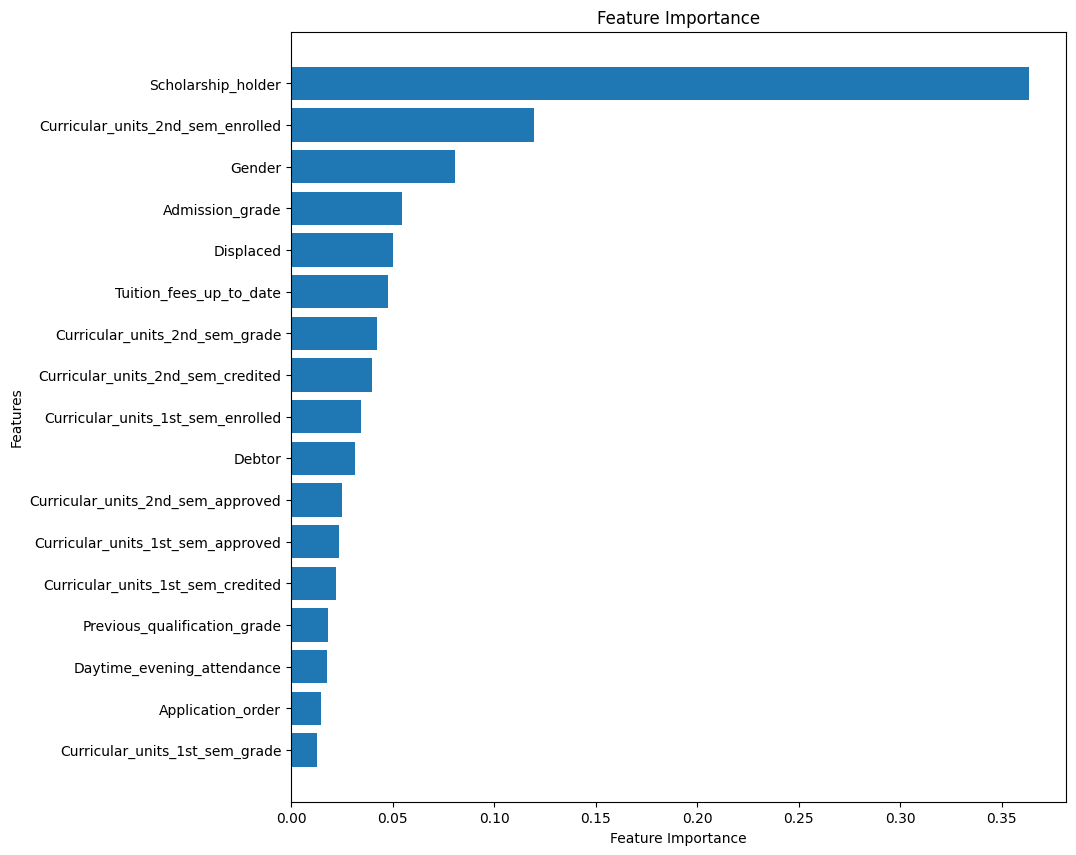

In [68]:
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

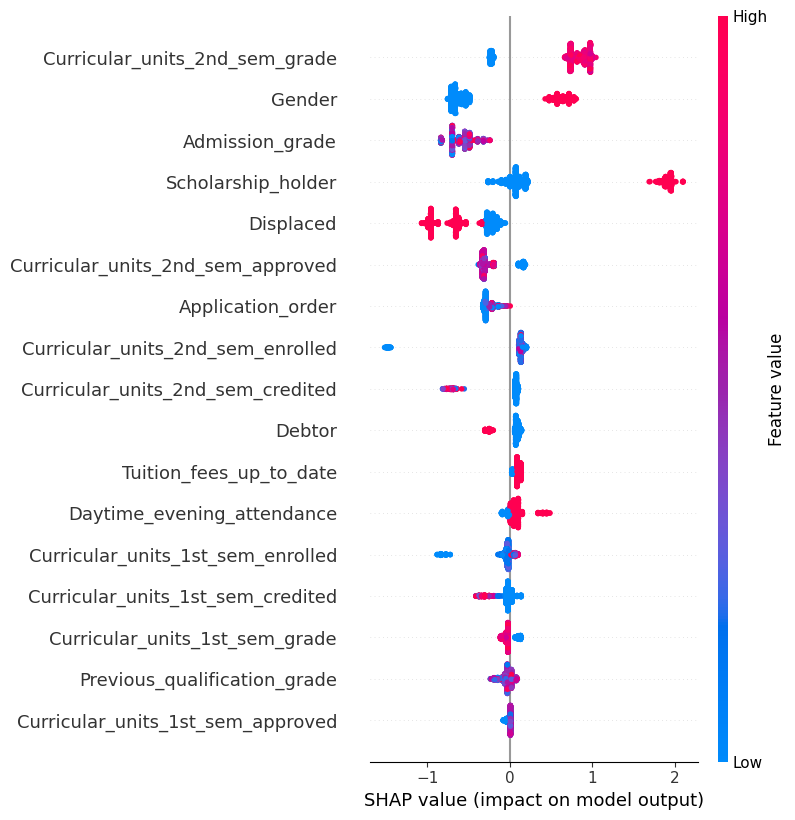

In [69]:
# Interpretable ML with SHAP (SHapley Additive exPlanations)
explainer = shap.TreeExplainer(model.get_booster())
shap_values = explainer.shap_values(X_test)
shap.initjs() # Initialize JavaScript for interactive plots
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Visualize all the training set predictions
# This plot provides an overview of the feature importance across the dataset.
shap.summary_plot(shap_values, X_test)

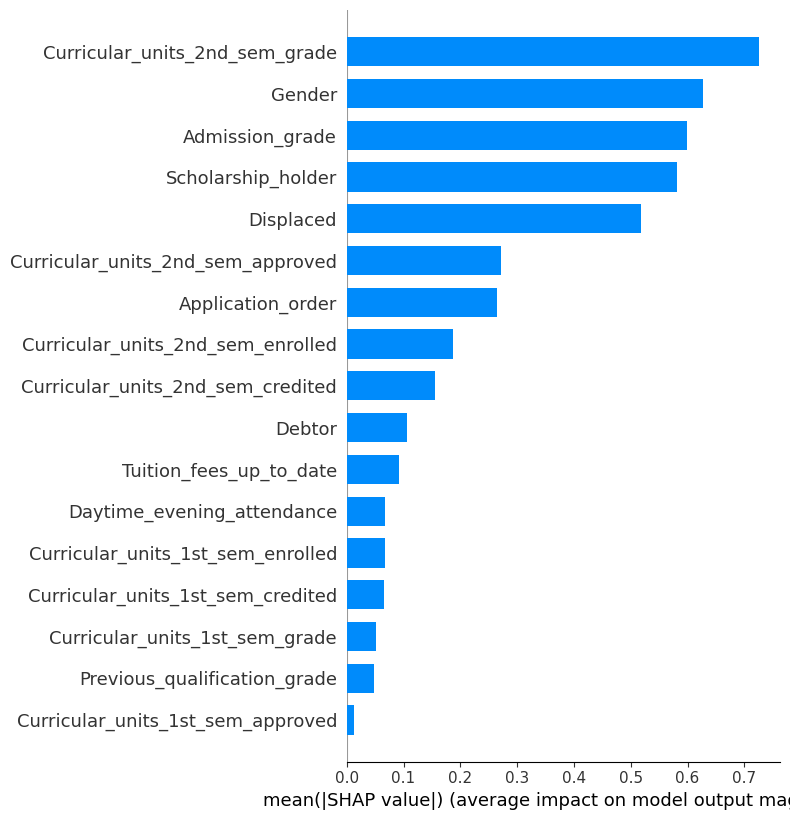

In [70]:
# Visualize SHAP summary plot 2
shap.summary_plot(shap_values, X_test, plot_type='bar')

### Prediction

In [71]:
df_enrolled = df_enrolled.reset_index(drop=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', standard_scaler, num_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [73]:
pipeline.named_steps['preprocessor'].fit(df_enrolled.drop(["Unemployment_rate", "GDP", "Inflation_rate", "Curricular_units_2nd_sem_evaluations",
                                                           "Curricular_units_2nd_sem_without_evaluations",
                                                           "Curricular_units_1st_sem_without_evaluations",
                                                           "Curricular_units_1st_sem_evaluations",
                                                           "Educational_special_needs","International", "Course", "Application_mode",
                                                           "Nacionality", "Mothers_qualification", "Fathers_qualification",
                                                           "Mothers_occupation", "Fathers_occupation", 'Marital_status','Age_at_enrollment',
                                                           "Previous_qualification","Status"], axis=1))

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(),
                                 ['Application_order',
                                  'Previous_qualification_grade',
                                  'Admission_grade',
                                  'Curricular_units_1st_sem_enrolled',
                                  'Curricular_units_2nd_sem_enrolled',
                                  'Curricular_units_1st_sem_credited',
                                  'Curricular_units_2nd_sem_credited',
                                  'Curricular_units_1st_sem_approved',
                                  'Curricular_units_2nd_sem_approved',
                                  'Curricular_units_1st_sem_grade',
                                  'Curricular_units_2nd_sem_grade'])])

In [74]:
y_pred_test = pipeline.predict(df_enrolled.drop(["Unemployment_rate", "GDP", "Inflation_rate", "Curricular_units_2nd_sem_evaluations",
                                                           "Curricular_units_2nd_sem_without_evaluations",
                                                           "Curricular_units_1st_sem_without_evaluations",
                                                           "Curricular_units_1st_sem_evaluations",
                                                           "Educational_special_needs","International", "Course", "Application_mode",
                                                           "Nacionality", "Mothers_qualification", "Fathers_qualification",
                                                           "Mothers_occupation", "Fathers_occupation", 'Marital_status','Age_at_enrollment',
                                                           "Previous_qualification","Status"], axis=1))

df_enrolled['Status'] = y_pred_test

In [75]:
df_enrolled.Status.value_counts()

,count
Status,
1,401
0,393


In [77]:
df_final = pd.concat([df_train, df_enrolled.drop(["Unemployment_rate", "GDP", "Inflation_rate", "Curricular_units_2nd_sem_evaluations",
                                                           "Curricular_units_2nd_sem_without_evaluations",
                                                           "Curricular_units_1st_sem_without_evaluations",
                                                           "Curricular_units_1st_sem_evaluations",
                                                           "Educational_special_needs","International", "Course", "Application_mode",
                                                           "Nacionality", "Mothers_qualification", "Fathers_qualification",
                                                           "Mothers_occupation", "Fathers_occupation", 'Marital_status','Age_at_enrollment',
                                                           "Previous_qualification"],axis=1)], ignore_index=True)

print("Shape of df_final:", df_final.shape)

Shape of df_final: (4424, 18)


In [78]:
df_final.to_csv('df_final.csv', index=False)